<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/unit_3_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

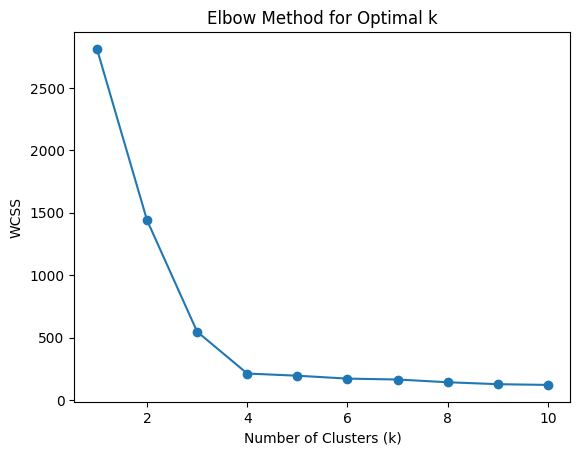

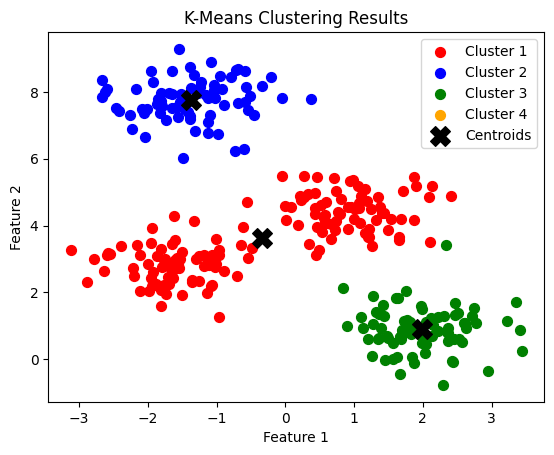

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
point1 = np.array([2, 3])
point2 = np.array([5, 7])
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))
euclidean = euclidean_distance(point1, point2)
print(f"Euclidean Distance: {euclidean:.4f}")
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))
manhattan = manhattan_distance(point1, point2)
print(f"Manhattan Distance: {manhattan:.4f}")
def cosine_similarity(p1, p2):
    dot_product = np.dot(p1, p2)
    norm1 = np.linalg.norm(p1)
    norm2 = np.linalg.norm(p2)
    return dot_product / (norm1 * norm2)
cosine = cosine_similarity(point1, point2)
print(f"Cosine Similarity: {cosine:.4f}")
def minkowski_distance(p1, p2, p):
    return np.power(np.sum(np.abs(p1 - p2) ** p), 1/p)
p_value = 3
minkowski = minkowski_distance(point1, point2, p_value)
print(f"Minkowski Distance (p={p_value}): {minkowski:.4f}")
vector1 = np.array([1, 1, 0, 0])
vector2 = np.array([1, 1, 1, 0])
jaccard = jaccard_score(vector1, vector2)
print(f"Jaccard Index (Similarity): {jaccard:.4f}")
print(" - Smaller distance = more similar (Euclidean, Manhattan, Minkowski)")
print(" - Larger similarity = more similar (Cosine, Jaccard)")


Euclidean Distance: 5.0000
Manhattan Distance: 7.0000
Cosine Similarity: 0.9995
Minkowski Distance (p=3): 4.4979
Jaccard Index (Similarity): 0.6667
 - Smaller distance = more similar (Euclidean, Manhattan, Minkowski)
 - Larger similarity = more similar (Cosine, Jaccard)


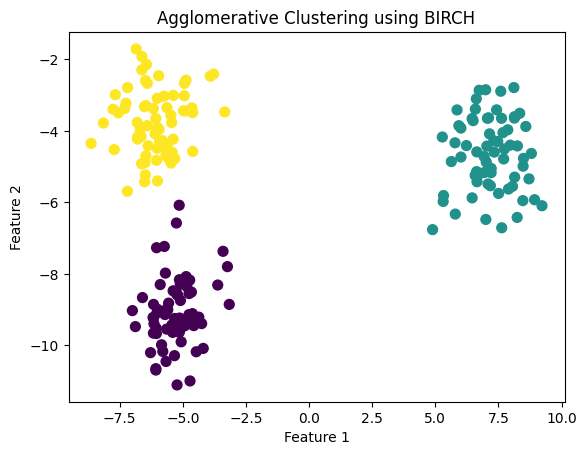

In [ ]:
# Agglomerative Hierarchical Clustering using BIRCH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
X, y = make_blobs(n_samples=200, centers=3)
birch = Birch(n_clusters=3)
birch.fit(X)
labels = birch.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering using BIRCH")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


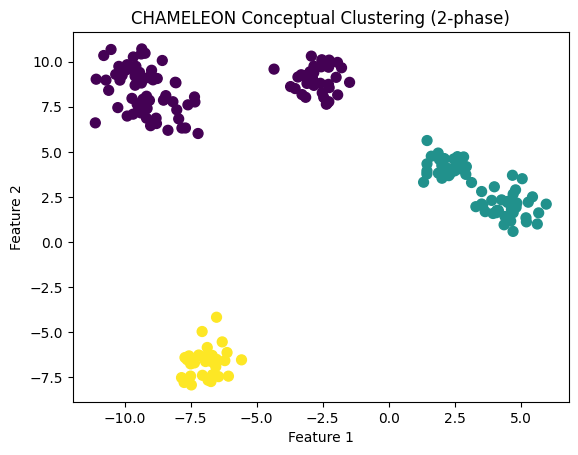

In [ ]:
# Agglomerative Hierarchical Clustering using CHAMELEON concept
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
X, y = make_blobs(n_samples=200, centers=6, random_state=42, cluster_std=0.7)
sub_clusters = KMeans(n_clusters=10, random_state=42)
sub_labels = sub_clusters.fit_predict(X)
agg = AgglomerativeClustering(n_clusters=3)
final_labels = agg.fit_predict(sub_clusters.cluster_centers_)
mapping = {i: final_labels[i] for i in range(len(final_labels))}
labels = np.array([mapping[sub_label] for sub_label in sub_labels])
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("CHAMELEON Conceptual Clustering (2-phase)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


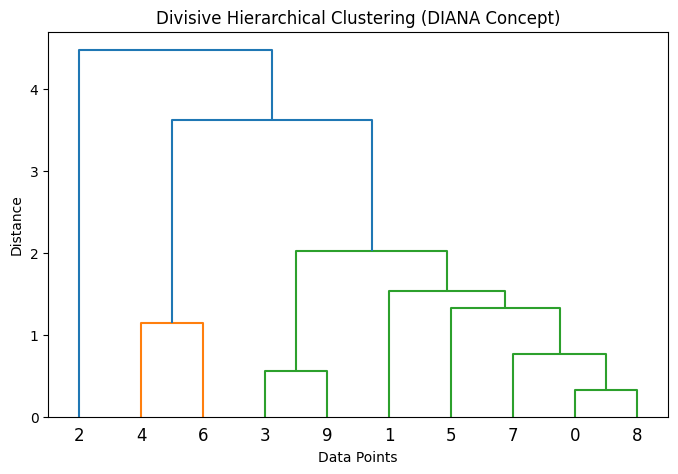

Cluster Labels: [2 2 3 2 1 2 1 2 2 2]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
X, y = make_blobs(n_samples=10, centers=1, random_state=0)
Z = linkage(X, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Divisive Hierarchical Clustering (DIANA Concept)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
labels = fcluster(Z, t=3, criterion='maxclust')
print("Cluster Labels:", labels)


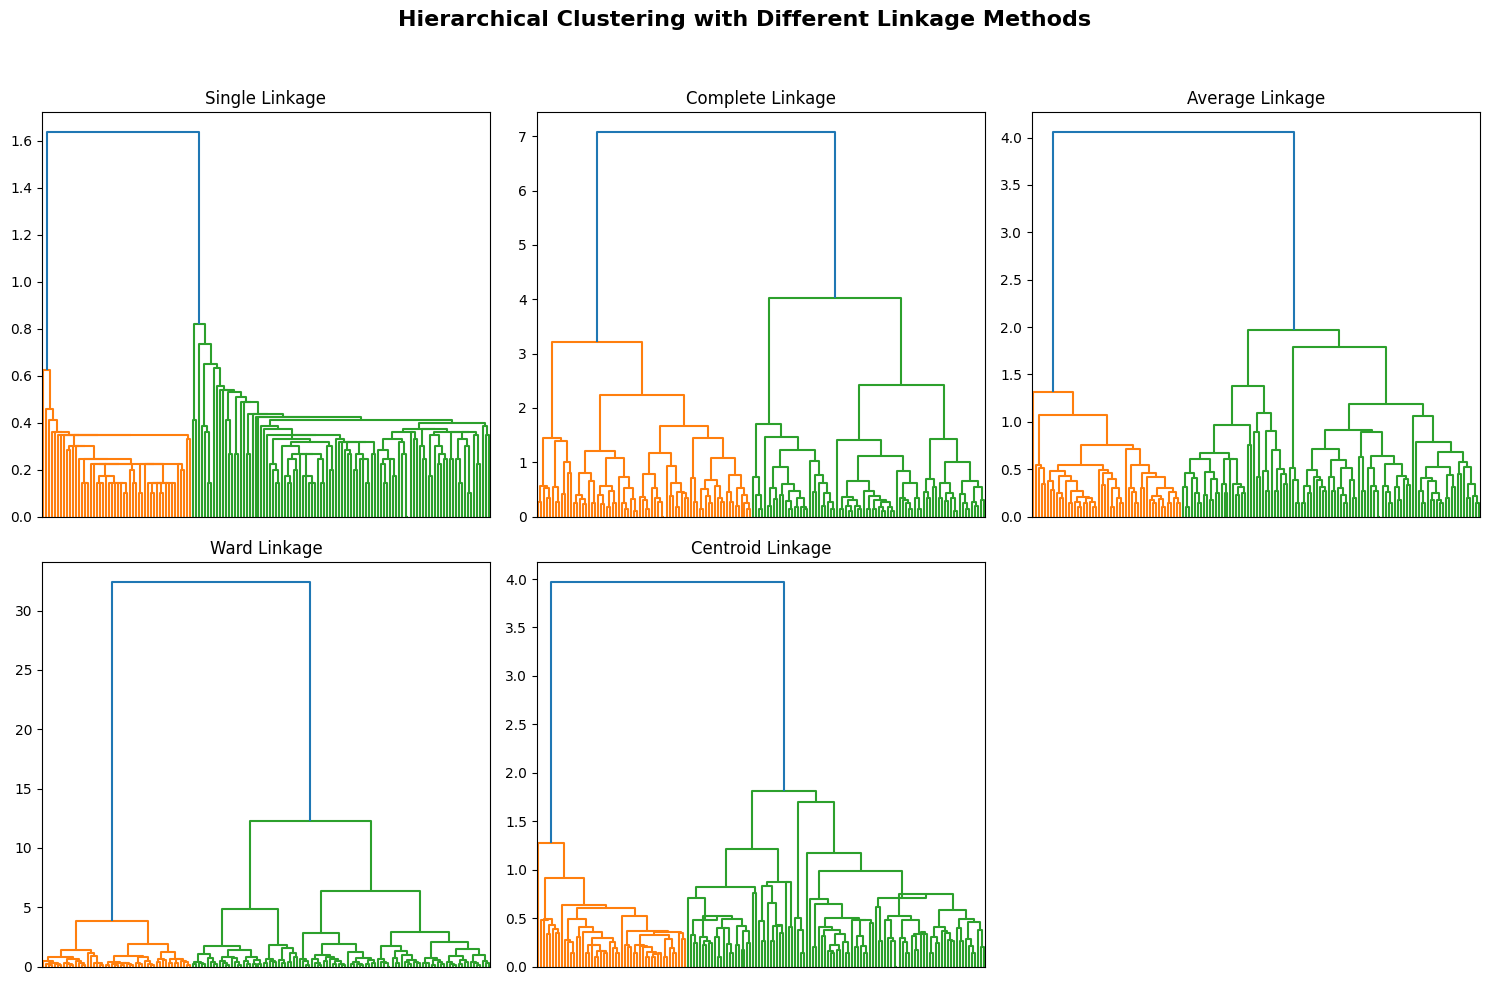

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
data = load_iris()
X = data.data
methods = ['single', 'complete', 'average', 'ward', 'centroid']
plt.figure(figsize=(15, 10))
plt.suptitle("Hierarchical Clustering with Different Linkage Methods", fontsize=16, fontweight='bold')
for i, method in enumerate(methods):
    plt.subplot(2, 3, i + 1)
    Z = linkage(X, method=method)
    dendrogram(Z, no_labels=True)
    plt.title(f"{method.capitalize()} Linkage")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


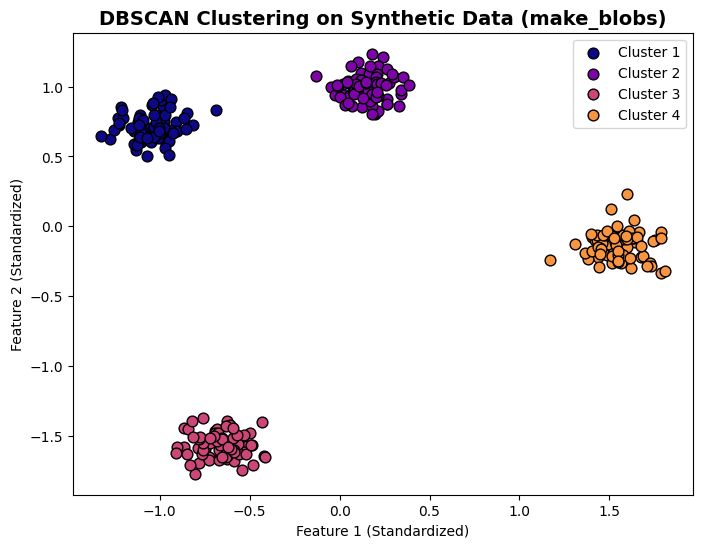

Number of clusters found: 4
Number of noise points: 0


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=42)
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        color = 'k'
        marker = 'x'
        label_name = 'Noise'
    else:
        color = plt.cm.plasma(label / len(unique_labels))
        marker = 'o'
        label_name = f'Cluster {label + 1}'

    plt.scatter(
        X_scaled[labels == label, 0],
        X_scaled[labels == label, 1],
        c=[color],
        marker=marker,
        label=label_name,
        s=60,
        edgecolor='k'
    )

plt.title("DBSCAN Clustering on Synthetic Data (make_blobs)", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {list(labels).count(-1)}")


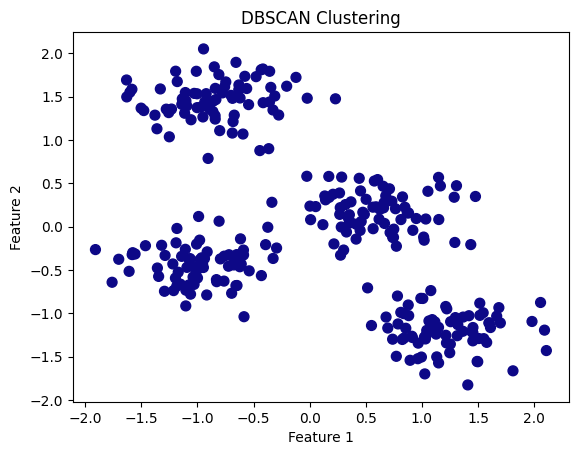

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


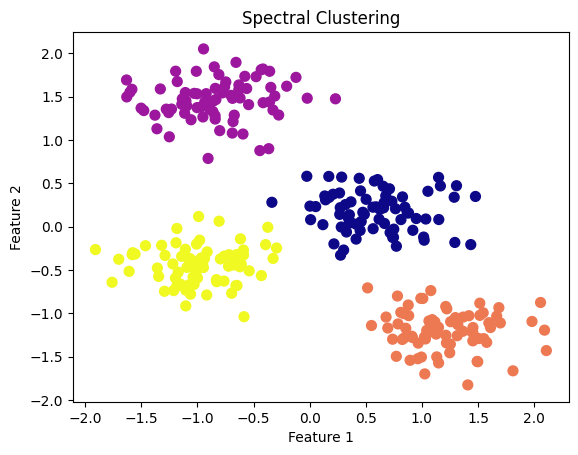

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
